In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from keras.models import Sequential
from keras.datasets import fashion_mnist

In [4]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)


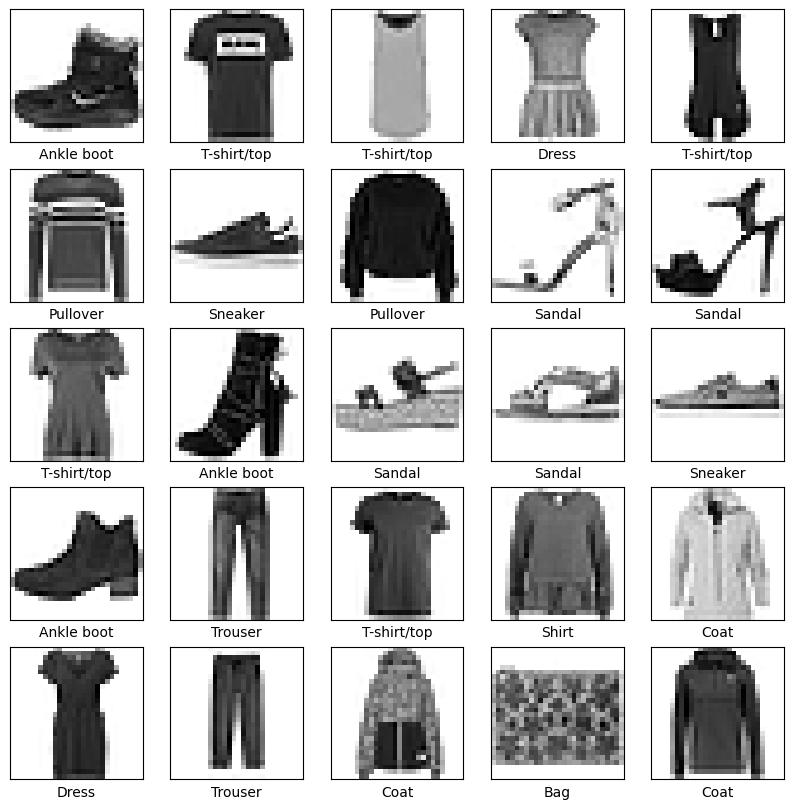

In [5]:
import matplotlib.pyplot as plt
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)

class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(16, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10,activation='softmax'))



In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 128)               5

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [10]:
model.fit(train_images,train_labels,epochs=5, validation_data=(test_images,test_labels))

Epoch 1/5
1875/1875 [==============================] - 61s 32ms/step - loss: 0.7191 - accuracy: 0.7938 - val_loss: 0.4270 - val_accuracy: 0.8407
Epoch 2/5
1875/1875 [==============================] - 77s 41ms/step - loss: 0.3872 - accuracy: 0.8578 - val_loss: 0.3667 - val_accuracy: 0.8661
Epoch 3/5
1875/1875 [==============================] - 82s 44ms/step - loss: 0.3385 - accuracy: 0.8730 - val_loss: 0.3844 - val_accuracy: 0.8608
Epoch 4/5
1875/1875 [==============================] - 77s 41ms/step - loss: 0.3072 - accuracy: 0.8856 - val_loss: 0.3224 - val_accuracy: 0.8832
Epoch 5/5
1875/1875 [==============================] - 69s 37ms/step - loss: 0.2855 - accuracy: 0.8928 - val_loss: 0.3146 - val_accuracy: 0.8876


In [13]:
prob_y = model.predict(train_images)
prob_y

1875/1875 [==============================] - 14s 8ms/step


array([[2.1043787e-12, 1.3410566e-14, 2.2768651e-12, ..., 3.1740656e-03,
        3.4979517e-13, 9.9682581e-01],
       [9.9977463e-01, 1.2455138e-09, 2.9248595e-06, ..., 6.0811856e-20,
        4.4775636e-10, 4.3765749e-19],
       [6.3470691e-01, 3.7740243e-03, 9.9333022e-03, ..., 2.6244493e-06,
        2.5239529e-04, 3.5707794e-06],
       ...,
       [6.6654611e-05, 6.3669398e-07, 2.7404454e-05, ..., 2.3967048e-09,
        3.1872064e-06, 3.9986741e-08],
       [7.2583294e-01, 1.2171925e-05, 1.3098515e-02, ..., 6.3049455e-08,
        3.5256224e-05, 2.2028541e-08],
       [1.3120367e-08, 3.2213077e-08, 4.9115960e-09, ..., 7.0990236e-06,
        3.9607467e-06, 1.5286436e-07]], dtype=float32)

In [15]:
y_pred = prob_y.argmax(axis=1)
y_pred

array([9, 0, 0, ..., 3, 0, 5], dtype=int64)

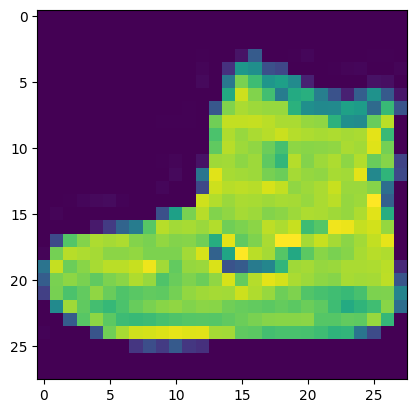

In [20]:
plt.imshow(train_images[0])

1/1 [==============================] - 0s 37ms/step


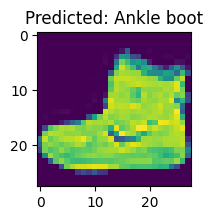

In [29]:
y_pred0 = model.predict(train_images[0].reshape(1, 28, 28))

predicted_class_index = np.argmax(y_pred0)

class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]
plt.figure(figsize=(2, 2))
plt.imshow(train_images[0])
plt.title("Predicted: " + class_names[predicted_class_index])
plt.show()